In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.crs as ccrs   # map plots
from e3sm_utils import cmclimate
cmap_prect = cmclimate.cm.WhiteBlueGreenYellowRed
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from glob import glob

In [8]:
import matplotlib.gridspec as gridspec

In [2]:
# prepare figure canvas:
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

# Spatial distribution of MCS precipitation over the US
* 25 km E3SM and SP-E3SM simulations
* Also obs

In [3]:
ds_sp = xr.open_mfdataset('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/statstb/monthly/mcs_rainmap_20??0[3-8]*.nc')
ds_e3sm = xr.open_mfdataset('/global/cscratch1/sd/crjones/ECP/e3sm/statstb/monthly/mcs_rainmap_20??0[3-8]*.nc')
ds_obs = xr.open_mfdataset('/global/cscratch1/sd/feng045/FACETS/obs/stats_25km/monthly/mcs_rainmap_20??0[3-8]*.nc')

In [31]:
ds_obs['mcs_precipitation_exp']

<xarray.DataArray 'mcs_precipitation_exp' (time: 78, lat: 105, lon: 161)>
dask.array<shape=(78, 105, 161), dtype=float32, chunksize=(1, 105, 161)>
Coordinates:
  * lon      (lon) float32 -110.0 -109.75 -109.5 -109.25 ... -70.5 -70.25 -70.0
  * lat      (lat) float32 25.0 25.25 25.5 25.75 26.0 ... 50.25 50.5 50.75 51.0
  * time     (time) datetime64[ns] 2004-03-01 2004-04-01 ... 2016-08-01
Attributes:
    long_name:  MCS precipitation from tracking (Experiment)
    units:      mm

In [32]:
dat_dict = {'SP-E3SM': ds_sp['mcs_precipitation'], 'E3SM': ds_e3sm['mcs_precipitation'], 'Obs': ds_obs['mcs_precipitation_ctl']}
seasons = ['MAM', 'JJA']
models = ['Obs', 'SP-E3SM', 'E3SM']
nyears = {'SP-E3SM': 7, 'E3SM': 3, 'Obs': 13}

In [6]:
extent = [250 - 360, 285 - 360, 28, 49]

In [42]:
# units in mm / day
dat_to_plot = {key: da.groupby('time.season').sum(dim='time') / (nyears[key] * 91) for key, da in dat_dict.items()}

In [34]:
dat_to_plot

{'SP-E3SM': <xarray.DataArray 'mcs_precipitation' (season: 2, lat: 120, lon: 320)>
 dask.array<shape=(2, 120, 320), dtype=float32, chunksize=(1, 120, 320)>
 Coordinates:
   * lat      (lat) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
   * lon      (lon) float32 220.125 220.375 220.625 ... 299.375 299.625 299.875
   * season   (season) object 'JJA' 'MAM',
 'E3SM': <xarray.DataArray 'mcs_precipitation' (season: 2, lat: 120, lon: 320)>
 dask.array<shape=(2, 120, 320), dtype=float32, chunksize=(1, 120, 320)>
 Coordinates:
   * lat      (lat) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
   * lon      (lon) float32 220.125 220.375 220.625 ... 299.375 299.625 299.875
   * season   (season) object 'JJA' 'MAM',
 'Obs': <xarray.DataArray 'mcs_precipitation_ctl' (season: 2, lat: 105, lon: 161)>
 dask.array<shape=(2, 105, 161), dtype=float32, chunksize=(1, 105, 161)>
 Coordinates:
   * lon      (lon) float32 -110.0 -109.75 -109.5 -109.25 ... -70.5 -70.25 -70.0
   *

In [57]:
fig = plt.figure(figsize=(12, 6), dpi=1200)
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.05])
ax_cb = fig.add_subplot(gs[-1, :])
cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50, 
             'label': 'MCS Precipitation (mm / day)'}
plot_kwargs = {'transform': ccrs.PlateCarree(), 'cmap': plt.cm.YlGnBu,
               'vmin': 0, 'vmax': 2.5}
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
dat_to_plot['Obs'].sel(season='MAM').plot(ax=ax1, cbar_ax=ax_cb, cbar_kwargs=cbar_kwargs, **plot_kwargs)
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
dat_to_plot['SP-E3SM'].sel(season='MAM').plot(ax=ax2, add_colorbar=False, **plot_kwargs)
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
dat_to_plot['E3SM'].sel(season='MAM').plot(ax=ax3, add_colorbar=False, **plot_kwargs)
ax4 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
dat_to_plot['Obs'].sel(season='JJA').plot(ax=ax4, add_colorbar=False, **plot_kwargs)
ax5 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
dat_to_plot['SP-E3SM'].sel(season='JJA').plot(ax=ax5, add_colorbar=False, **plot_kwargs)
ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
dat_to_plot['E3SM'].sel(season='JJA').plot(ax=ax6, add_colorbar=False, **plot_kwargs)
ax_titles = ['Obs  MAM', 'SP-E3SM  MAM', 'E3SM  MAM',
             'Obs  JJA', 'SP-E3SM  JJA', 'E3SM  JJA']
for i, (ax, ax_title) in enumerate(zip([ax1, ax2, ax3, ax4, ax5, ax6], ax_titles)):
    ax.set_extent([250 - 360, 285 - 360, 28, 49])
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.5)
    ax.coastlines()
    # format gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.set_title(ax_title)
plt.savefig('central_us_mcs_precip.png', bbox_inches='tight', dpi=1200)

# Ratio of MCS Precipitation to total precipitation

In [75]:
dat_numerator = {'SP-E3SM': ds_sp['mcs_precipitation'], 'E3SM': ds_e3sm['mcs_precipitation'], 'Obs': ds_obs['mcs_precipitation_ctl']}
dat_denom = {'SP-E3SM': ds_sp['precipitation'], 'E3SM': ds_e3sm['precipitation'], 'Obs': ds_obs['precipitation']}
dat_to_plot = {key: dat_numerator[key].groupby('time.season').sum(dim='time') / dat_denom[key].groupby('time.season').sum(dim='time') for key in dat_numerator.keys()}

In [76]:
fig = plt.figure(figsize=(12, 6), dpi=1200)
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.05])
ax_cb = fig.add_subplot(gs[-1, :])
# levels = np.arange(0, 0.9, 0.1)
cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50, 
             'label': 'Ratio of MCS Precipitation / Total Precipitation'}
cb_opts = {'add_colorbar': False}
cb_plotter = {'cbar_ax': ax_cb, 'cbar_kwargs': cbar_kwargs}
# tester:
# cb_opts = {}
# cb_plotter = {}
plot_kwargs = {'transform': ccrs.PlateCarree(), 'cmap': cmap_prect, # 'robust': True, # 'levels': levels,
               'vmin': 0, 'vmax': 0.7,
              }
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
dat_to_plot['Obs'].sel(season='MAM').plot(ax=ax1, **cb_plotter, **plot_kwargs)
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
dat_to_plot['SP-E3SM'].sel(season='MAM').plot(ax=ax2, **cb_opts, **plot_kwargs)
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
dat_to_plot['E3SM'].sel(season='MAM').plot(ax=ax3, **cb_opts, **plot_kwargs)
ax4 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
dat_to_plot['Obs'].sel(season='JJA').plot(ax=ax4, **cb_opts, **plot_kwargs)
ax5 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
dat_to_plot['SP-E3SM'].sel(season='JJA').plot(ax=ax5, **cb_opts, **plot_kwargs)
ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
dat_to_plot['E3SM'].sel(season='JJA').plot(ax=ax6, **cb_opts, **plot_kwargs)
ax_titles = ['Obs  MAM', 'SP-E3SM  MAM', 'E3SM  MAM',
             'Obs  JJA', 'SP-E3SM  JJA', 'E3SM  JJA']
for i, (ax, ax_title) in enumerate(zip([ax1, ax2, ax3, ax4, ax5, ax6], ax_titles)):
    ax.set_extent([250 - 360, 285 - 360, 28, 49])
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.5)
    ax.coastlines()
    # format gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.set_title(ax_title)
plt.savefig('central_us_mcs_precip_ratio.png', bbox_inches='tight', dpi=1200)

# MCS Count

In [77]:
dsa = xr.open_dataset('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/seasonal_mcs_count_land_only.nc')
dsb = xr.open_dataset('/global/cscratch1/sd/crjones/ECP/e3sm/seasonal_mcs_count_land_only.nc')
ds = xr.concat([dsa, dsb], dim=pd.Index(('SP-E3SM', 'E3SM'), name='model'))

In [80]:
seasons = ['MAM', 'JJA']

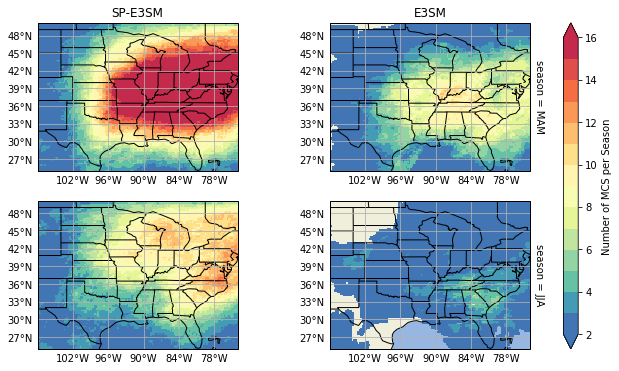

In [110]:
dat = ds['seasonal_mcs_count']
dat = dat.where(dat > 0)
levels = np.arange(2, 17)
p = dat.sel(season=seasons).mean(dim='year').plot(row='season', col='model',
                                                  transform=ccrs.PlateCarree(),
                                                  subplot_kws={'projection': ccrs.PlateCarree()},
                                                  cmap=plt.cm.Spectral_r, figsize=(12, 6), robust=True,
                                                  cbar_kwargs={'label': 'Number of MCS per Season'},
                                                  levels=levels,
                                                  )
ax_titles = ['SP-E3SM', 'E3SM', None, None]
for ax, ax_title in zip(p.axes.flat, ax_titles):
    ax.set_extent([252 - 360, 286 - 360, 25, 49])
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.set_title(ax_title)
plt.savefig('seasonal_mcs_count_v0.png', bbox_inches='tight', dpi=1200)

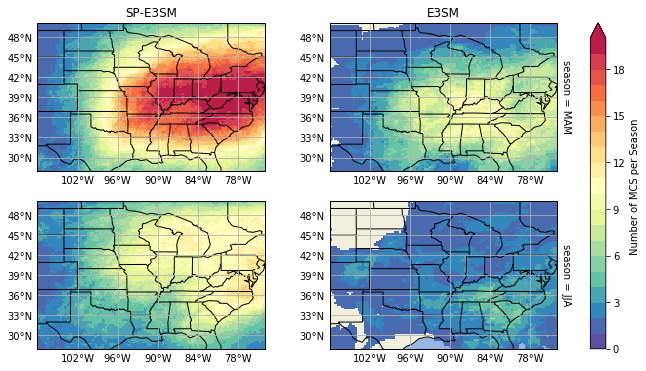

In [108]:
dat = ds['seasonal_mcs_count']
dat = dat.where(dat > 0)
levels = np.arange(0, 21)
p = dat.sel(season=seasons).mean(dim='year').plot(row='season', col='model',
                                                  transform=ccrs.PlateCarree(),
                                                  subplot_kws={'projection': ccrs.PlateCarree()},
                                                  cmap=plt.cm.Spectral_r, figsize=(12, 6), robust=True,
                                                  cbar_kwargs={'label': 'Number of MCS per Season'},
                                                  levels=levels,
                                                  )
ax_titles = ['SP-E3SM', 'E3SM', None, None]
for ax, ax_title in zip(p.axes.flat, ax_titles):
    ax.set_extent([252 - 360, 286 - 360, 28, 49])
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.set_title(ax_title)
plt.savefig('seasonal_mcs_count_v1.png', bbox_inches='tight', dpi=1200)

In [111]:
ds

<xarray.Dataset>
Dimensions:             (lat: 120, lon: 320, model: 2, season: 3, track: 310, year: 7)
Coordinates:
  * year                (year) datetime64[ns] 2001-06-30 ... 2007-06-30
  * season              (season) object 'MAM' 'JJA' 'SON'
  * lat                 (lat) float32 20.125 20.375 20.625 ... 49.625 49.875
  * lon                 (lon) float32 220.125 220.375 ... 299.625 299.875
  * track               (track) int64 1 2 3 4 5 6 7 ... 305 306 307 308 309 310
  * model               (model) object 'SP-E3SM' 'E3SM'
Data variables:
    seasonal_mcs_count  (model, year, season, lat, lon) float64 0.0 0.0 ... nan
    init_loc            (model, year, track) float64 2.0 1.0 1.0 ... nan nan nan

In [95]:
ax0 = p.axes[0, 1]

In [106]:
ax0.get_

In [113]:
ds_obs

<xarray.Dataset>
Dimensions:                      (lat: 105, lon: 161, time: 78)
Coordinates:
  * lon                          (lon) float32 -110.0 -109.75 ... -70.25 -70.0
  * lat                          (lat) float32 25.0 25.25 25.5 ... 50.75 51.0
  * time                         (time) datetime64[ns] 2004-03-01 ... 2016-08-01
Data variables:
    precipitation                (time, lat, lon) float32 dask.array<shape=(78, 105, 161), chunksize=(1, 105, 161)>
    mcs_precipitation_ctl        (time, lat, lon) float32 dask.array<shape=(78, 105, 161), chunksize=(1, 105, 161)>
    mcs_precipitation_exp        (time, lat, lon) float32 dask.array<shape=(78, 105, 161), chunksize=(1, 105, 161)>
    mcs_precipitation_count_ctl  (time, lat, lon) float32 dask.array<shape=(78, 105, 161), chunksize=(1, 105, 161)>
    mcs_precipitation_count_exp  (time, lat, lon) float32 dask.array<shape=(78, 105, 161), chunksize=(1, 105, 161)>
    mcs_number_ctl               (time, lat, lon) float32 dask.array<sha

# MCS size distribution?

In [114]:
ds_sp1 = xr.open_mfdataset('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/statstb/robust_mcs_tracks_*.nc')

In [168]:
ds_sp1.mcs_length.attrs

OrderedDict([('description', 'Length of each MCS defined by cloud shield'),
             ('units', 'hour')])

In [127]:
ds_obs1 = xr.open_mfdataset('/global/cscratch1/sd/feng045/FACETS/obs/stats_25km/robust_mcs_tracks_20??0301_*.nc')
ds_obs1

<xarray.Dataset>
Dimensions:             (nmaxmerge: 100, nmaxpf: 10, nmaxpix: 10000, times: 60, tracks: 3888)
Coordinates:
  * times               (times) float32 0.0 1.0 2.0 3.0 ... 56.0 57.0 58.0 59.0
  * tracks              (tracks) int64 0 1 2 3 4 5 6 ... 320 321 322 323 324 325
Dimensions without coordinates: nmaxmerge, nmaxpf, nmaxpix
Data variables:
    length              (tracks) float32 dask.array<shape=(3888,), chunksize=(304,)>
    mcs_length          (tracks) float32 dask.array<shape=(3888,), chunksize=(304,)>
    mcs_type            (tracks) int16 dask.array<shape=(3888,), chunksize=(304,)>
    starttrackresult    (tracks) float32 dask.array<shape=(3888,), chunksize=(304,)>
    endtrackresult      (tracks) float32 dask.array<shape=(3888,), chunksize=(304,)>
    base_time           (tracks, times) datetime64[ns] dask.array<shape=(3888, 60), chunksize=(304, 60)>
    julian_day          (tracks, times) float64 dask.array<shape=(3888, 60), chunksize=(304, 60)>
    datetimest

(array([408., 503., 359., 251., 168.,  99.,  63.,  40.,  34.,  13.,  24.,
         15.,   4.,   5.,   2.,   2.,   0.,   0.,   1.,   3.]),
 array([  73125. ,  202062.5,  331000. ,  459937.5,  588875. ,  717812.5,
         846750. ,  975687.5, 1104625. , 1233562.5, 1362500. , 1491437.5,
        1620375. , 1749312.5, 1878250. , 2007187.5, 2136125. , 2265062.5,
        2394000. , 2522937.5, 2651875. ], dtype=float32),
 <a list of 20 Patch objects>)

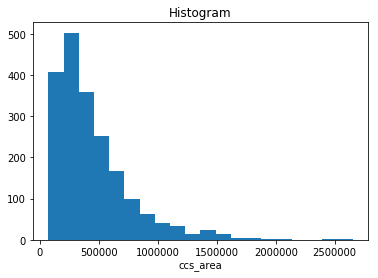

In [123]:
ds_sp1.ccs_area.max(dim='times').plot.hist(bins=20)

(array([9.140e+02, 1.105e+03, 6.710e+02, 3.970e+02, 2.590e+02, 1.760e+02,
        1.050e+02, 9.300e+01, 5.700e+01, 3.300e+01, 3.000e+01, 1.500e+01,
        1.200e+01, 7.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([  80625.  ,  182343.75,  284062.5 ,  385781.25,  487500.  ,
         589218.75,  690937.5 ,  792656.25,  894375.  ,  996093.75,
        1097812.5 , 1199531.2 , 1301250.  , 1402968.8 , 1504687.5 ,
        1606406.2 , 1708125.  , 1809843.8 , 1911562.5 , 2013281.2 ,
        2115000.  ], dtype=float32),
 <a list of 20 Patch objects>)

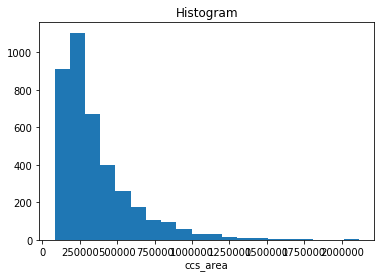

In [128]:
ds_obs1.ccs_area.max(dim='times').plot.hist(bins=20)

In [138]:
mam = ds_sp1['base_time.month'] < 6
mam

<xarray.DataArray 'month' (tracks: 1994, times: 120)>
dask.array<shape=(1994, 120), dtype=bool, chunksize=(259, 120)>
Coordinates:
  * times    (times) float32 0.0 1.0 2.0 3.0 4.0 ... 116.0 117.0 118.0 119.0
  * tracks   (tracks) int64 0 1 2 3 4 5 6 7 ... 290 291 292 293 294 295 296 297

In [169]:
mam.shape

(1994, 120)

In [151]:
ds_sp1['ccs_area'].where(mam).max(dim='times').mean().values

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/ho

array(572781.94, dtype=float32)

In [152]:
mam_obs = ds_obs1['base_time.month'] < 6
ds_obs1['ccs_area'].where(mam_obs).max(dim='times').mean().values

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/ho

array(483861.22, dtype=float32)

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/ho

Text(0.5, 0, 'MCS length (hours) in MAM')

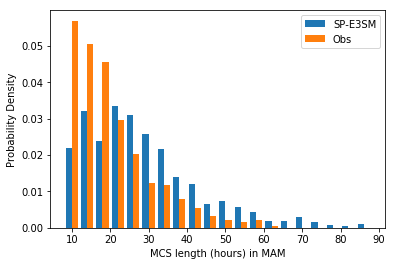

In [172]:
fig, ax = plt.subplots()
the_vals2 = [ds_sp1['mcs_length'].where(mam[:,0]).values, 
             ds_obs1['mcs_length'].where(mam_obs[:,0]).values]
ax.hist(the_vals2, bins=20, histtype='bar', density=True)
ax.legend(['SP-E3SM', 'Obs'])
ax.set_ylabel('Probability Density')
ax.set_xlabel('MCS length (hours) in MAM')

In [ ]:
ds_obs1.l

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/ho

Text(0.5, 0, 'maximum ccs_area (km$^2$) in MAM')

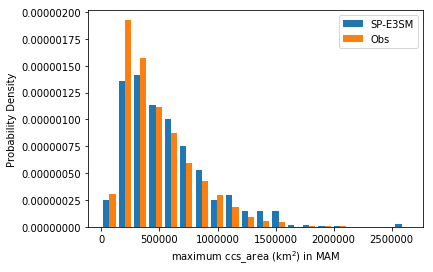

In [167]:
fig, ax = plt.subplots()
the_vals = [ds_sp1['ccs_area'].where(mam).max(dim='times').values, 
            ds_obs1['ccs_area'].where(mam_obs).max(dim='times').values]
ax.hist(the_vals, bins=20, histtype='bar', density=True)
ax.legend(['SP-E3SM', 'Obs'])
ax.set_ylabel('Probability Density')
ax.set_xlabel('maximum ccs_area (km$^2$) in MAM')
# ds_sp1['ccs_area'].where(mam).max(dim='times').plot.hist(ax=ax, bins=20);
# ds_obs1['ccs_area'].where(mam_obs).max(dim='times').plot.hist(ax=ax, bins=20);
# Make a multiple-histogram of data-sets with different length.
# x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
# ax3.hist(x_multi, n_bins, histtype='bar')
# ax3.set_title('different sample sizes')

In [158]:
the_vals

[array([176250., 352500., 722500., ...,     nan,     nan,     nan],
       dtype=float32),
 array([ 745625., 1945000.,  776250., ...,      nan,      nan,      nan],
       dtype=float32)]

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/ho

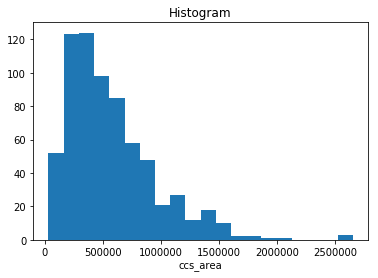

In [153]:
ds_sp1['ccs_area'].where(mam).max(dim='times').plot.hist(bins=20);

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/global/ho

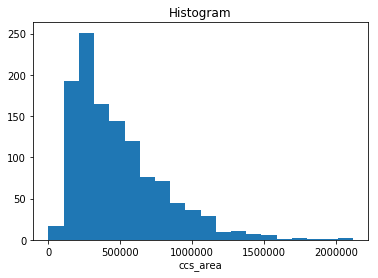

In [154]:
ds_obs1['ccs_area'].where(mam_obs).max(dim='times').plot.hist(bins=20);